# Step8 演習03 ニューラルネットワークを使った画像認識
---

Step8 演習03 ではニューラルネットワークを使った画像認識に取り組みます。

画像データは配列で与えられます。

例えば縦が10ピクセル、横が10ピクセルの場合、全部で100ピクセルの画像になるため、100個のデータを持つ配列になります。

これから見るデータは「0」と「1」のデータが１００個並んだ１次元配列で縦が10ピクセル、横が10ピクセルの画像データを表しています。

まずは、以下の例を通して、画像データがどのように表現されるのか確認してみましょう。

**はじめに**
- for文やwhile文の利用は明示的な利用指示がない場所での使用は避けてください。

**本演習の目的**
- ニューラルネットワークを使った画像認識に取り組む。

## ライブラリのインポート

まずはじめに、利用するライブラリのインポートを行います。

- [NumPy](http://www.numpy.org) 数値計算を行うための基本パッケージの公式ドキュメント
- [Matplotlib](http://matplotlib.org) グラフ描画ライブラリの基本パッケージの公式ドキュメント
- [scikit-learn](http://scikit-learn.org/stable/index.html) Pythonのオープンソース機械学習ライブラリの公式ドキュメント

ドキュメントには有用な情報が書き記されています。何か迷ったときには必ずドキュメントに戻ってくるようにしましょう。

次のセルをそのまま実行（"SHIFT" + "ENTER"）してください。コードが書いてあるセルは**上から順番に**順次実行してください。

** 注意： **初めてmatplotlibを使うユーザーは、フォント一覧のキャッシュが存在しないため、このセルの実行でWarningが出ます。もう一度実行すると、すでにキャッシュができているので、Warningなく走ります。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier

## 「０」と「１」の配列データを画像として表示してみる

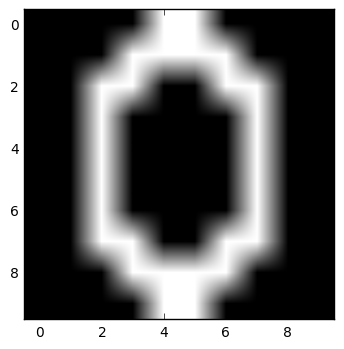

In [2]:
n0 = [0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
          0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
          0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
          0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
          0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
          0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
          0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
          0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
          0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
          0, 0, 0, 0, 1, 1, 0, 0, 0, 0]
n0 = np.array(n0, dtype = np.uint8)
n0 = n0.reshape(10, 10, 1)
plt.imshow(n0[:,:,0], cmap = 'gray')
plt.show()

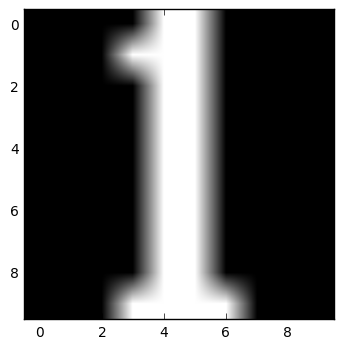

In [3]:
n1 = [0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
          0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
          0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
          0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
          0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
          0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
          0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
          0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
          0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
          0, 0, 0, 1, 1, 1, 1, 0, 0, 0]
n1 = np.array(n1, dtype = np.uint8)
n1 = n1.reshape(10, 10, 1)
plt.imshow(n1[:,:,0], cmap = 'gray')
plt.show()

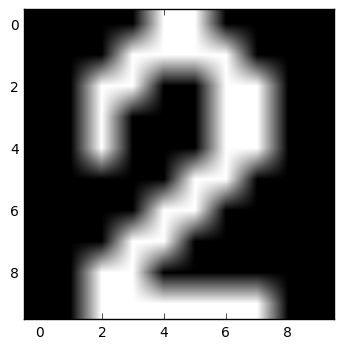

In [4]:
n2 = [0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
          0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
          0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
          0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
          0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
          0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
          0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
          0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
          0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
          0, 0, 1, 1, 1, 1, 1, 1, 0, 0]
n2 = np.array(n2, dtype = np.uint8)
n2 = n2.reshape(10, 10, 1)
plt.imshow(n2[:,:,0], cmap = 'gray')
plt.show()

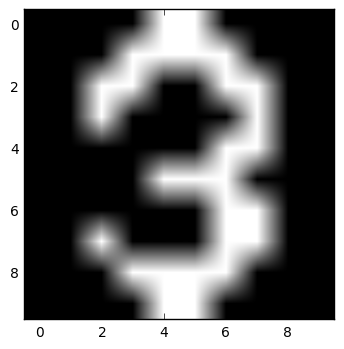

In [5]:
n3 = [0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
          0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
          0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
          0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
          0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
          0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
          0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
          0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
          0, 0, 0, 0, 1, 1, 0, 0, 0, 0]
n3 = np.array(n3, dtype = np.uint8)
n3 = n3.reshape(10, 10, 1)
plt.imshow(n3[:,:,0], cmap = 'gray')
plt.show()

上記の例では、配列を画像データとして表示するために、１０x１０x１の多次元配列に NumPyの reshape で変換しています（最後の次元はカラーチャネルの次元であり、ここではカラーがモノクロなので１チャネルとしています）。

## 画像（数字）を分類する

各画像の入力データxはずらりと並んだ１００個の数値です。

一旦１０x１０x１の多次元配列に変換した画像データは flatten() という関数を使うと１次元配列に戻ります。

そうして作ったデータを入力 $x$ として使いましょう。

In [6]:
x = np.array([n0.flatten(), n1.flatten(), n2.flatten(), n3.flatten()])

下のセルを実行して、flatten() した結果を格納した $x$ のshapeを確認しましょう。

In [7]:
x.shape

(4, 100)

### 正解ラベルを準備しよう

ラベル $y$ として、マルチクラス分類でよく用いられる「one-hotエンコーディング」を使うことにします。

ここでは先ほど準備した１０x１０x１の**画像の数字０から３のラベル**を用意します。

- 数字が０の場合は [1, 0, 0, 0]
- 数字が１の場合は [0, 1, 0, 0]
- 数字が２の場合は [0, 0, 1, 0]
- 数字が３の場合は [0, 0, 0, 1]

というように、対応する場所だけが「1」で、それ以外は「0」の配列としてone-hotエンコーディングします。

** 【課題６】 ** 上の例を参考にone-hotエンコーディング（Noneを「０」または「１」に書き換えてください。）を実装してください。

ただし、配列の左から順番に数字が０、１、２、３の場合とします。

In [11]:
#Coursemale-02 Step8 QuestionNumber6 25533abd817497eea36e94ce39916eee
#適切な 関数・変数・値 などにNoneを書き換えてください。
y = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

** 左上の保存マークをクリックした後**、次のセルをShift+Enterで実行して採点します。

In [12]:
%%bash
./validation_client.py male-02 8 6 Step8_03.ipynb api.internal.zero2one.jp

Congratulations!
We give you 10 points out of 10 points.



## ニューラルネットワークのモデル

下記の条件で、ニューラルネットワークのモデルを構築します：

- 入力層のニューロン数 ２個
- 隠れ層のニューロン数 10個
- 出力層のニューロン数 4個

上記のような出力が４つのニューラルネットワークモデルとします。

ここではニューラルネットワークのモデルを構築するのにscikit-learnの「MLPClassifier」を利用します。

上記で定義したニューラルネットワークのモデルのコードは下のセルのコードブロックのように記述できます。

下のセルを実行すると次のテキストが出力されます。

- Training set score: 1.000000
- Test set score: 1.000000

**各スコアが1にならない場合は、スコアが1になるまで何度かセルを実行してみてみてください。**

Training set score: 1.000000
Test set score: 1.000000


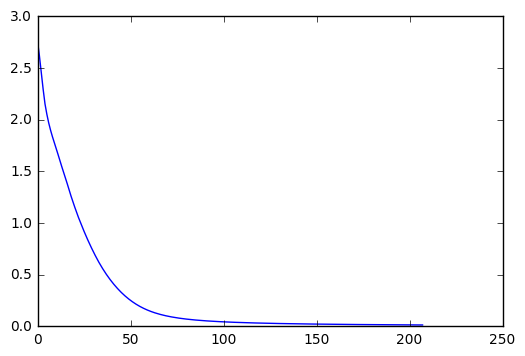

In [13]:
X_train, X_test = x, x
y_train, y_test = y, y

mlp = MLPClassifier(hidden_layer_sizes=(10),
                    activation='relu',
                    max_iter=10000,
                    alpha=0,
                    solver='sgd',
                    verbose=0,
                    learning_rate_init=0.01)

mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

plt.plot(mlp.loss_curve_)
plt.show()

**「Training set score」と「Test set score」の出力がそれぞれ「１」**になったことを確認したら次へ進んでください。

## フォワードプロパゲーション
フォワードプロパジェーションで数字が正しく分離されることを確認してみましょう。

In [14]:
def relu(x):
    y = np.maximum(0, x)
    return y

def softmax(x):
    c = np.max(x) #オーバーフロー対策
    exp_x = np.exp(x - c)
    y = exp_x / np.sum(exp_x, axis=1, keepdims=True) 
    return y

W1 = mlp.coefs_[0]
b1 = mlp.intercepts_[0]
W2 = mlp.coefs_[1]
b2 = mlp.intercepts_[1]

#　フォワードプロパゲーション
#入力
x = np.array([n0.flatten(), n1.flatten(),  n2.flatten(),  n3.flatten()])

#隠れ層
layer1_z = np.dot(x, W1) + b1
layer1_a = relu(layer1_z)          # relu Activation

#出力
layer2_z = np.dot(layer1_a, W2) + b2
layer2_a = softmax(layer2_z)       # softmax

print(layer2_a)

[[9.99918318e-01 3.88507539e-07 2.75736657e-05 5.37200238e-05]
 [5.96397167e-08 9.99975242e-01 1.04081609e-05 1.42901551e-05]
 [1.22798556e-05 1.17685326e-05 9.99975122e-01 8.29159178e-07]
 [4.46158738e-05 1.77484822e-05 2.29886366e-07 9.99937406e-01]]


## 学習結果を可視化
学習の結果手に入った係数（パラメータ）を可視化してみましょう。

配列を10x10にreshapeして画像として表示してみると、何となく数字が現れることが分かります。

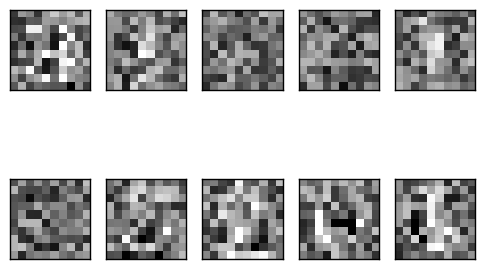

In [15]:
fig, axes = plt.subplots(2, 5)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(10, 10), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

## MINSTの画像データの分類
MNISTの画像データを分類してみましょう。

In [16]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier

mnist = fetch_mldata("MNIST original")
X, y = mnist.data / 255., mnist.target
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

mlp = MLPClassifier(hidden_layer_sizes=(50),
                    max_iter=10,
                    alpha=1e-4,
                    solver='sgd',
                    verbose=10,
                    learning_rate_init=0.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Iteration 1, loss = 0.32129923
Iteration 2, loss = 0.14928602
Iteration 3, loss = 0.11381627
Iteration 4, loss = 0.09511688
Iteration 5, loss = 0.08084749
Iteration 6, loss = 0.07274011
Iteration 7, loss = 0.06434155
Iteration 8, loss = 0.05854434
Iteration 9, loss = 0.05118941
Iteration 10, loss = 0.04757581


/opt/conda/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.987367
Test set score: 0.972000


非常に高い確率で画像を分類ができたとが分かります。係数を可視化してみましょう。

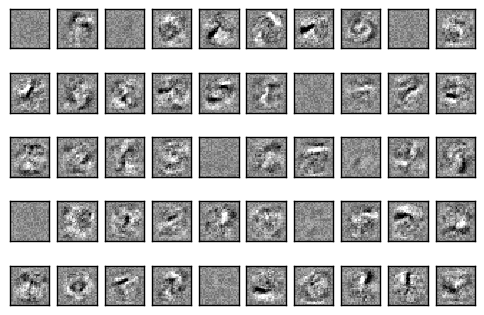

In [17]:
fig, axes = plt.subplots(5, 10)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

## 「０」と「１」の配列データを画像として表示してみる（オプション）

本演習では０から３までの数字を人為的に作成し学習をおこなってみました。

時間に余裕がある方は４以降の数字を作成して、ニューラルネットワークのモデルの学習に取り組んでみてください。

In [19]:
n4 = [
    
    
    
    
    
    
]
n4 = np.array(n4, dtype = np.uint8)
n4 = n4.reshape(10, 10, 1)
plt.imshow(n4[:,:,0], cmap = 'gray')
plt.show()

ValueError: cannot reshape array of size 0 into shape (10,10,1)

In [20]:
n5 = [
    
    
    
    
    
    
]
n5 = np.array(n5, dtype = np.uint8)
n5 = n5.reshape(10, 10, 1)
plt.imshow(n5[:,:,0], cmap = 'gray')
plt.show()

ValueError: cannot reshape array of size 0 into shape (10,10,1)

In [21]:
n6 = [
    
    
    
    
    
    
]
n6 = np.array(n6, dtype = np.uint8)
n6 = n6.reshape(10, 10, 1)
plt.imshow(n6[:,:,0], cmap = 'gray')
plt.show()

ValueError: cannot reshape array of size 0 into shape (10,10,1)

In [22]:
n7 = [
    
    
    
    
    
    
]
n7 = np.array(n7, dtype = np.uint8)
n7 = n7.reshape(10, 10, 1)
plt.imshow(n7[:,:,0], cmap = 'gray')
plt.show()

ValueError: cannot reshape array of size 0 into shape (10,10,1)

In [23]:
n8 = [
    
    
    
    
    
    
]
n8 = np.array(n8, dtype = np.uint8)
n8 = n8.reshape(10, 10, 1)
plt.imshow(n8[:,:,0], cmap = 'gray')
plt.show()

ValueError: cannot reshape array of size 0 into shape (10,10,1)

In [24]:
n9 = [
    
    
    
    
    
    
]
n9 = np.array(n9, dtype = np.uint8)
n9 = n9.reshape(10, 10, 1)
plt.imshow(n9[:,:,0], cmap = 'gray')
plt.show()

ValueError: cannot reshape array of size 0 into shape (10,10,1)

In [25]:
x = np.array([n0.flatten(), n1.flatten(), n2.flatten(), n3.flatten(), n4.flatten(), n5.flatten(), n6.flatten(), n7.flatten(), n8.flatten(), n9.flatten()])

In [26]:
x.shape

(10,)

In [27]:
y = np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [28]:
X_train, X_test = x, x
y_train, y_test = y, y

mlp = MLPClassifier(hidden_layer_sizes=(10),
                    activation='relu',
                    max_iter=10000,
                    alpha=0,
                    solver='sgd',
                    verbose=0,
                    learning_rate_init=0.01)

mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

plt.plot(mlp.loss_curve_)
plt.show()

ValueError: setting an array element with a sequence.

In [29]:
W1 = mlp.coefs_[0]
b1 = mlp.intercepts_[0]
W2 = mlp.coefs_[1]
b2 = mlp.intercepts_[1]

#　フォワードプロパゲーション
#入力
x = np.array([n0.flatten(), n1.flatten(), n2.flatten(), n3.flatten(), n4.flatten(), n5.flatten(), n6.flatten(), n7.flatten(), n8.flatten(), n9.flatten()])

#隠れ層
layer1_z = np.dot(x, W1) + b1
layer1_a = relu(layer1_z)          # relu Activation

#出力
layer2_z = np.dot(layer1_a, W2) + b2
layer2_a = softmax(layer2_z)       # softmax

print(layer2_a)

AttributeError: 'MLPClassifier' object has no attribute 'coefs_'